# **Breast Canser Ultrasond Image Classification and Segmentation**

1. Introduction
2. Dataset
3. Methodology
4. Results
5. Next Steps

## **Motivation**

- Breast cancer is one of the leading causes of death among women worldwide.
- Early detection plays a crucial role in reducing mortality rates and improving patient outcomes.
- Ultrasound imaging is a safe and widely used technique for breast cancer examination and early detection.
- However, the interpretation of ultrasound images can be challenging, even for experienced radiologists, due to the complexity and variability of breast lesions.


## **Promlem Statement**

- Our goal is to develop a deep learning-based system for accurate
classification and
segmentation of breast masses in ultrasound images.
- By leveraging state-of-the-art deep learning techniques and a comprehensive dataset of breast ultrasound images, we aims to assist radiologists in
  - the early detection and diagnosis of breast cancer,
  - potentially improving the efficiency and accuracy of the screening process.


## **Dataset**

- Source
  - HuggingFace: https://huggingface.co/datasets/gymprathap/Breast-Cancer-Ultrasound-Images-Dataset
  - Kaggle: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

- Discussed in
  - Paper name: Al-Dhabyani, W., Gomaa, M., Khaled, H., & Fahmy, A. (2020). Dataset of breast ultrasound images. Data in Brief, 28, 104863.
  - Paper Link: https://www.sciencedirect.com/science/article/pii/S2352340919312181

- Content
  - The paper provides a critical evaluation of the breast ultrasound dataset by W. The paper is widely cited.
  - The dataset contains breast ultrasound images with binary masks highlighting lesions.

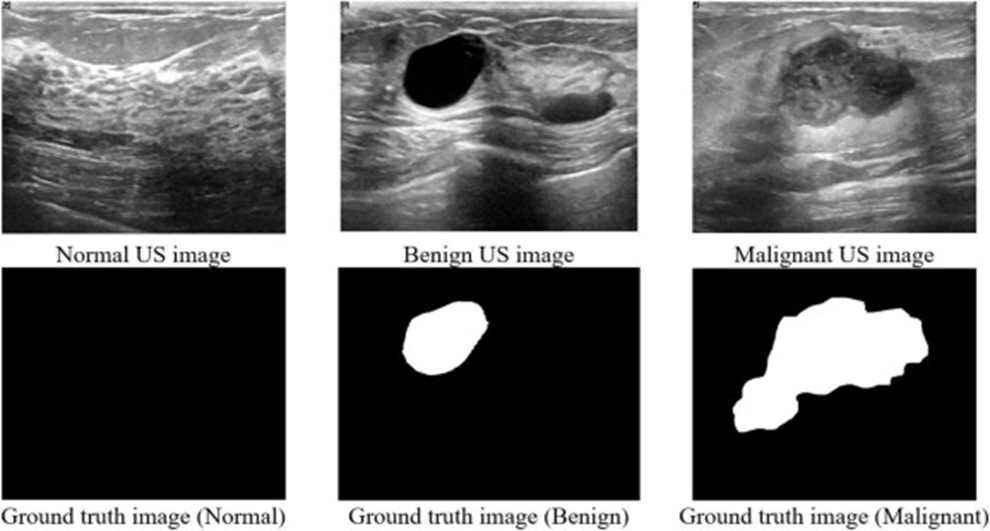

## **Data Analysis**


Data Format
- Ultrasound images
- Segmentation masks per image
- Text classification label per image


There are 780 image sample from 600 female patients 780 image samples.


There are three classes, which are imbalanced:
- Benign: 56.5%
- Malignant: 26.7%
- Normal: 16.9%


The main issues we had with the dataset:
- Inconsistencies such as duplicates (235 images)
- Discrepancies in masks, and images with anomalies like foreign objects (e.g. needles).
- Some images are mislabeled

To combat this we used augmentation and resampling.

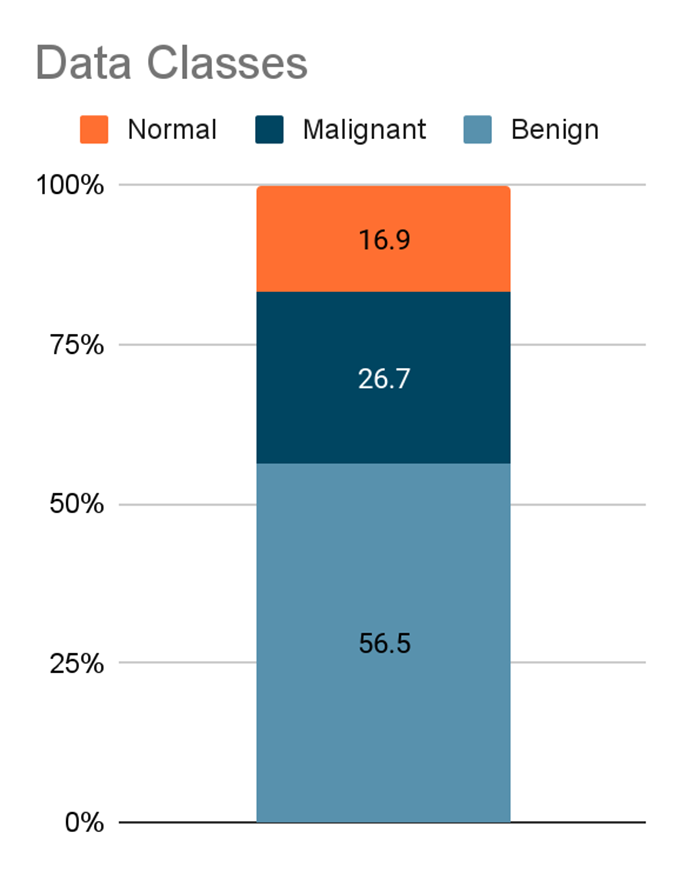

## **Literature Reviews**

#### Papers reivewed for Classification:
- VGG19 - Breast cancer classification based on convolutional neural network and image fusion approaches using ultrasound images:
  - Alotaibi, M., Aljouie, A., Alluhaidan, N., et al. (2023). Breast cancer classification using CNN and image fusion with ultrasound. Heliyon, 9(11), e22406. https://doi.org/10.1016/j.heliyon.2023.e22406

  - VGG19 can have good performance for this task
  - Image preprocessing such as denoising or RGB fusion can help raise accuracy significantly when combining multiple preprocess

- Resnet50 - ResNet-50 based deep neural network using transfer learning for brain tumor classification:
  - Sahaai, M. B., Jothilakshmi, G. R., Ravikumar, D., Prasath, R., & Singh, S. (2022). ResNet-50 based deep neural network using transfer learning for brain tumor classification. AIP Conference Proceedings, 2463(1), 020014. https://doi.org/10.1063/5.0082328
  - ResNet50 has residual connections which help train deep networks effectively by mitigating vanishing gradient issues, enabling improved accuracy on complex image datasets.


#### Papers reviewed for Segmentation
- UNet - U-Net: Convolutional Networks for Biomedical Image Segmentation:
  - Ronneberger, O., Fischer, P., & Brox, T. (2015). U-Net: Convolutional networks for biomedical image segmentation. arXiv preprint arXiv:1505.04597. https://arxiv.org/abs/1505.04597
  - U-net is efficient for this task in both accuracy and amount of data required.
  - Its encoder-decoder structure with skip connections allows precise localization and detailed segmentation

- DeepLabV3 - Rethinking Atrous Convolution for Semantic Image Segmentation:
  - Chen, L.-C., Papandreou, G., Schroff, F., & Adam, H. (2017). Rethinking atrous convolution for semantic image segmentation. arXiv preprint arXiv:1706.05587. https://arxiv.org/abs/1706.05587
  - DeepLabV3 leverages dilated convolutions and multi-scale context, which can enhance segmentation accuracy in challenging images.

### **The Classification Task**
- Utilise Convolutional Neural Network.
- Used pretrained model with transfer learning to fit our task.
- Classify into 3 types: Normal, Benign, and Malignant.


- **VGG-19**
  - Use fully convolutional layer.
  - Pooling about every 2 - 4 layers.

### Model Architectures


- **ResNet50**
  - Utilize skip connections.
  - Use Fully connected layer for the last layer.

Insert Image find resnet arch

---



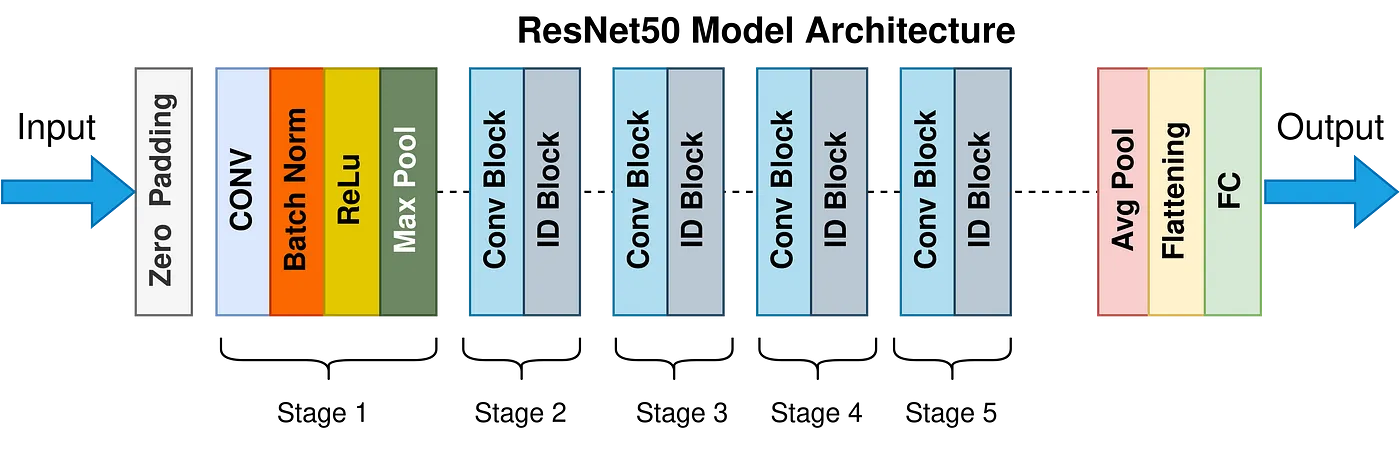

- Refer to ResNet50Classifier.ipynb for ResNet50 Model

- **VGG-19**
  - Use fully convolutional layer.
  - Pooling about every 2 - 4 layers.

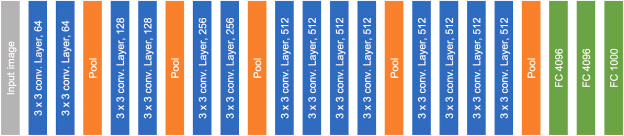

- Refer to Classification_vgg19.ipynb for VGG-19 model.


## **The Segmentation Task**

We took three main steps for the segmentation approach, mainly being starting of with traditional ml segmentation, then moving to tried and tested models such as DeepLabV3 and modified versions of U-net. After this we made an ensemble using the trained models used. Lastly making a combined model using ur best models.

#### **Traditional Segmentation**

The goal here was to make an algorithm that performed image segmentation using intensity thresholding and binary morphological operators.
This was done comparative analysis as will be shown in the results.


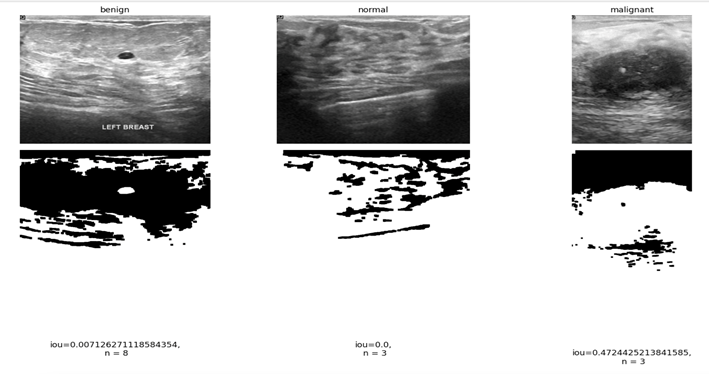

- Refer to traditional_segmantation.ipynb for traditional segmentation

#### **DeepLabV3 Segmentation**
- Model Architecture:
  - Backbone: DeepLabV3 with pretrained ResNet101 for feature extraction.
- Training Process:
  - Loss Function: Cross-entropy for segmentation performance.
  - Optimizer: Adam with learning rate adjustments.
  - DataLoader: Batches of images and masks for model input.
  
DeepLabV3 was chosen as uses a special method that helps it understand the bigger picture in an image by looking at different detail levels.
This lets it capture more context without making the model more complicated or slower to process



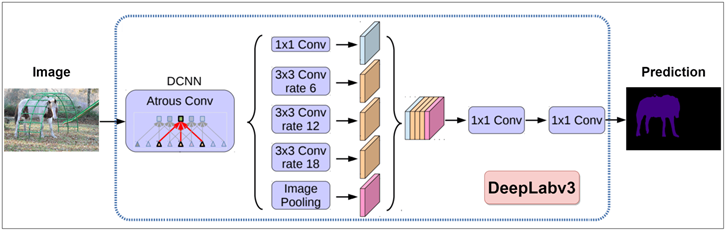

- Refer to DeeplabV3_Segmentation.ipynb for DeeplabV3 model

### **UNet Segmentation**

- Structure highlight：
  - Symmetric structure for encoder and decoder path
  - Each encoder layer is mirrored with a decoder layer
- Key feature:
  - Skip connection to keep detailed spatial information and semantic information


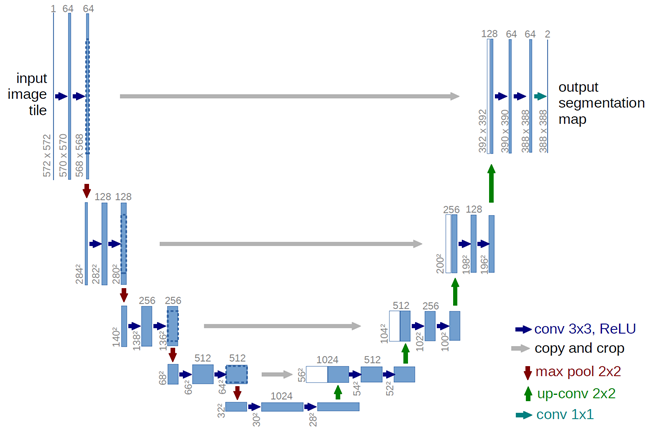

### **Unet Segmentation**

- Modified UNet:
  - Batch Normalization implemented after each convolutional layer
  - Stabilize the training process
  - Improves generalization
Combination of BCE loss and Dice Loss:
  - Addresses both pixel-level accuracy and overall segmentation quality
- Deeper UNet


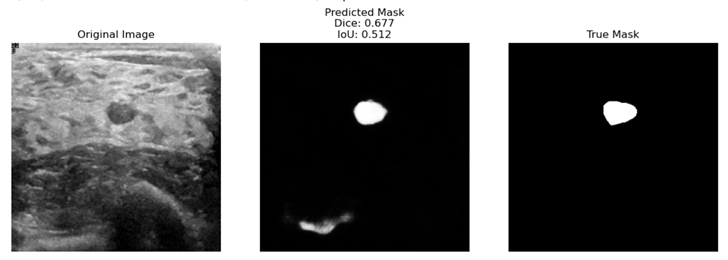

- Refer to Modified_Unet_Segmentation.ipynb for Modified Unet Model
- Refer to Deeper_Unet_Segmentation.ipynb for Deeper Unet Model

### Ensemble

- Combine results of deep learning models for improved segmentation results.
  - Simple ensemble by averaging
  - Confidence-based combination

- Advantages
  - Leverages deep learning models trained for the task
  - Low computational cost
  - Easily expandable


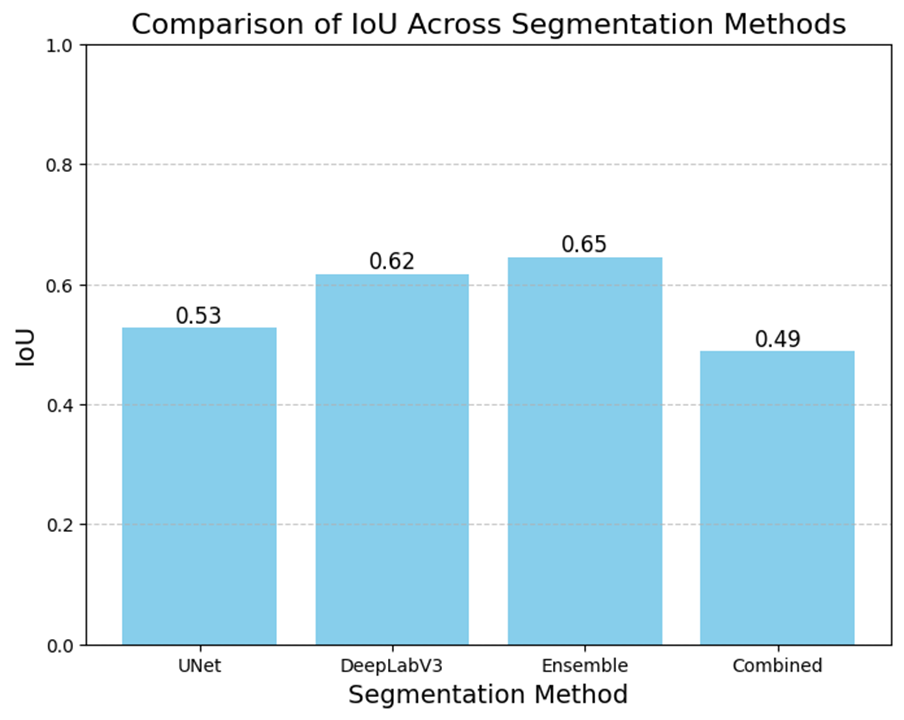

- Refer to breast-cancer-segmentation-ensemble.ipynb for Ensemble and Combination Model

## **Results**

### **Classification**

- F1 score was selected as it provides a robust validation metric that focuses on balances precision and recall making it an all rounder for evaluating overall performance.
- We also have the confusion matrix which shows how well the model performed.

**Classification analysis**
- VGG-19 has a higher validation F1 score than ResNet50, indicating slightly better performance.
- The difference in F1 scores (0.0104) shows both models perform similarly, but VGG-19 is slightly better.
- VGG-19 is the preferred choice due to its higher validation performance.


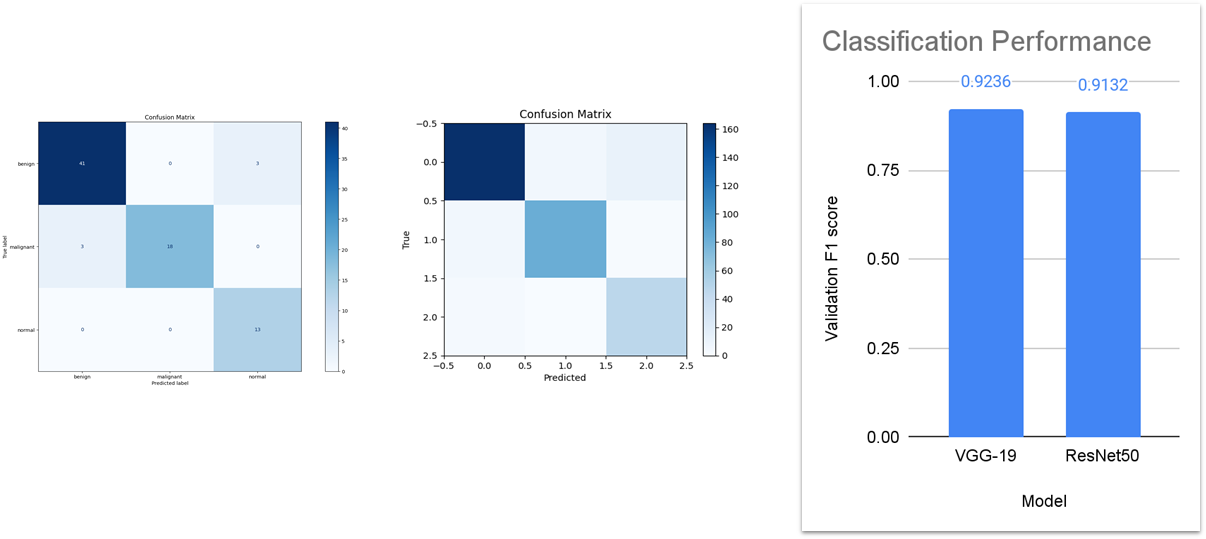

### **Segmentation**

- Ensemble shows the strongest performance with an IoU of 0.645, demonstrating the advantages of model combination
- DeepLabv3 achieves a solid IoU of 0.617, making it the best performing single model in our tests
- The standard UNet maintains reasonable performance with an IoU of 0.528, providing a stable baseline
- Surprisingly, the Combined approach shows underwhelming results with an IoU of 0.488, performing the lowest among all methods

These findings suggest:
- The Ensemble method should be prioritized when computational resources permit, as it leverages the strengths of multiple models
- DeepLabv3 remains a strong choice for single-model implementation, though it may require more computational power
- Basic UNet can serve as a reliable baseline model when resource efficiency is needed
- The Combined approach needs reevaluation, possibly requiring adjustments to its combination strategy or weight distribution

The results highlight the effectiveness of ensemble learning while indicating that not all combination strategies yield improved results. This provides clear direction for future model selection and optimization efforts.


## **Next Steps**

**Improvement in Classification:**
- Maintain current approach, as our classification meets requirements.

**Enhancement in Segmentation:**
- Integrate DeepLabv3+ for more precise segmentation outcomes.
Explore advanced segmentation methods to refine model accuracy.

**Model Ensemble Expansion:**
- Use more intelligent weighted combination techniques for confidence-based ensemble.
- Experiment with various model architectures to identify the best ensemble combinations:
- Transformer based models combining SegFormer and Segmenter.

**Further Research & Testing**
- Conduct extensive testing with new models to analyze performance gains.
- Compare results across segmentation and classification to validate improvements.


## **Conclusion**

Successful Classification of Breast Cancer Types, demonstrating robust capability across Benign, Malignant and Normal cases.

Successfully built models that perform segmentation of breast cancer areas:
- UNet variations
- DeepLabV3
- Ensemble methods

The models showcase advancements in the segmentation of complex tissue structures, which is vital for supporting early and accurate cancer detection.

Clear pathway to improve segmentation results through better models.
